In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tld

from wordcloud import WordCloud

%matplotlib inline

## Darmstadt

In [2]:
daSpider = pd.read_csv('data/DarmstadtSpider.csv')
daSpider.head()

,from,url,text
0,https://www.darmstadt.de/leben-in-darmstadt/,http://www.iv-senioren-darmstadt.de/home.html,Interessenvertretung
1,https://www.darmstadt.de/leben-in-darmstadt/,http://www.darmstadt-stadtlexikon.de,Stadtlexikon
2,https://www.darmstadt.de/leben-in-darmstadt/,http://www.unserebroschuere.de/Stadt_Darmstadt...,Deutsch / Englisch
3,https://www.darmstadt.de/leben-in-darmstadt/,http://www.unserebroschuere.de/Stadt_Darmstadt...,Französisch / Spanisch
4,https://www.darmstadt.de/leben-in-darmstadt/,http://www.unserebroschuere.de/Stadt_Darmstadt...,Türkisch Arabisch


### Top-Level Domains der verlinkten Webseiten

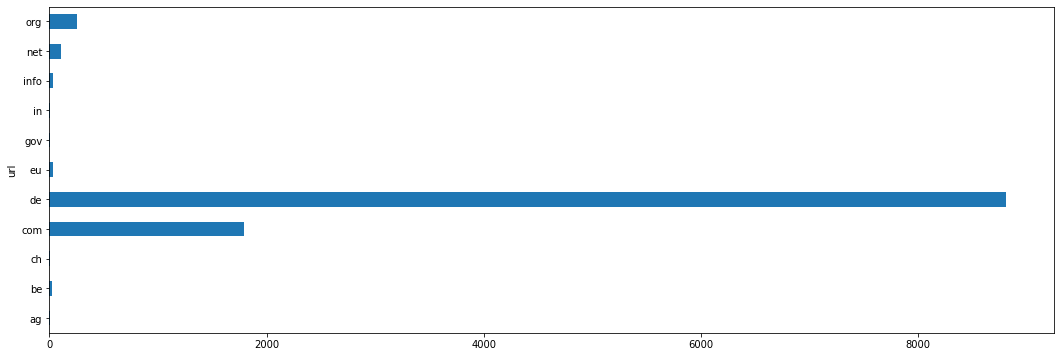

In [3]:
tlds = daSpider[["url"]].applymap(lambda x: tld.get_tld(x, fail_silently=True))
tlds = tlds.groupby(by="url").size()
tlds.plot.barh(figsize=(18,6))
plt.show()

### Häufigkeitsverteilung der verlinkenden Seiten pro ausgehender URL

In [4]:
domains = daSpider.copy(deep=True)[["from", "url"]]
domains["url"] = domains["url"].map(lambda x: tld.get_tld(x, fail_silently=True, as_object=True) \
    .parsed_url.netloc if tld.get_tld(x, fail_silently=True, as_object=True) else "")

domains = domains.groupby(by="url")[["from"]].nunique().rename(columns={"from": "count"})
domains = domains.sort_values(by="count", axis=0, ascending=False)
domains.head(10)

,count
url,
www.darmstadt-stadtlexikon.de,1673
www.iv-senioren-darmstadt.de,1661
app-eu.readspeaker.com,1658
www.echo-online.de,124
www.ladadi.de,105
www.familien-willkommen.de,94
www.rmv.de,70
www.munzinger.de,66
www.bmfsfj.de,63


### Eigene Statistiken

#### Verwendete Protokolle

In [15]:
protocols = daSpider.copy(deep=True)[["from", "url"]]
protocols["url"] = protocols["url"].apply(lambda x: tld.get_tld(x, fail_silently=True, as_object=True).parsed_url.scheme if tld.get_tld(x, fail_silently=True, as_object=True) else "")
protocols = protocols.groupby(by="url", as_index=False)[["from"]].nunique().rename(columns={"from": "count"})
protocols[protocols.url.str.len() > 0].head(10)

,url,count
1,http,2182
2,https,1946


#### Häufige Begriffe innerhalb der Link-Texte

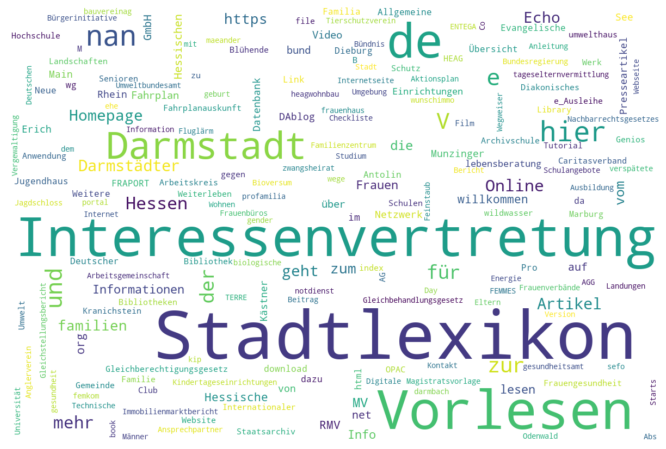

In [17]:
text = " ".join(str(linktext) for linktext in daSpider["text"])
wordcloud = WordCloud(background_color="white", width=1200, height=800, min_font_size=10, collocations=False).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hessen

In [7]:
heSpider = pd.read_csv('data/HessenPresse.csv')

In [8]:
heSpider.head()

,from,url,text
0,https://www.hessen.de/presse,https://english.hessen.de,EnglishEN
1,https://www.hessen.de/presse,https://service.hessen.de/,Service Hessen
2,https://www.hessen.de/presse,https://staatskanzlei.hessen.de,Staatskanzlei
3,https://www.hessen.de/presse,https://wirtschaft.hessen.de,Wirtschaftsministerium
4,https://www.hessen.de/presse,https://innen.hessen.de,Innenministerium


### Top-Level Domains der verlinkten Webseiten

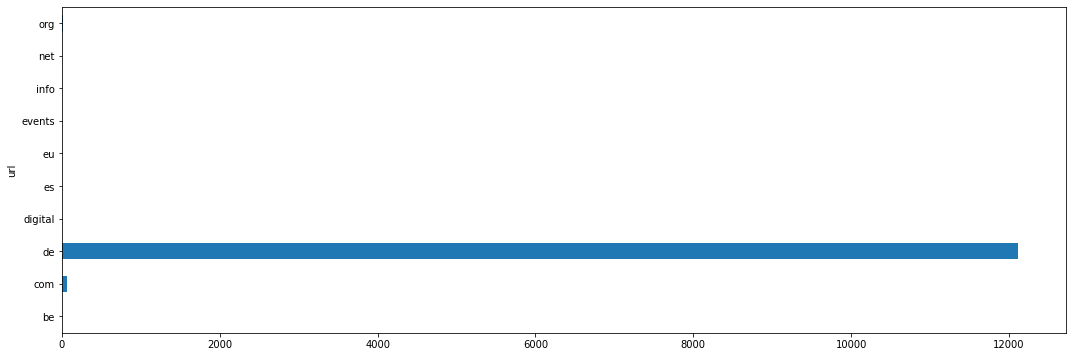

In [9]:
tlds = heSpider[["url"]].applymap(lambda x: tld.get_tld(x, fail_silently=True))
tlds = tlds.groupby(by="url").size()
tlds.plot.barh(figsize=(18,6))
plt.show()

### Häufigkeitsverteilung der verlinkenden Seiten pro ausgehender URL an

In [10]:
domains = heSpider.copy(deep=True)[["from", "url"]]
domains["url"] = domains["url"].apply(lambda x: tld.get_tld(x, fail_silently=True, as_object=True).parsed_url.netloc if tld.get_tld(x, fail_silently=True, as_object=True) else "")
domains = domains.groupby(by="url")[["from"]].nunique().rename(columns={"from": "count"})
domains = domains.sort_values(by="count", axis=0, ascending=False)
domains.head(10)

,count
url,
english.hessen.de,5448
service.hessen.de,3932
wirtschaft.hessen.de,300
innen.hessen.de,165
finanzen.hessen.de,165
soziales.hessen.de,164
staatskanzlei.hessen.de,142
umwelt.hessen.de,139
kultusministerium.hessen.de,136


### Eigene Statistiken

#### Verwendete Protokolle

In [14]:
protocols = heSpider.copy(deep=True)[["from", "url"]]
protocols["url"] = protocols["url"].apply(lambda x: tld.get_tld(x, fail_silently=True, as_object=True).parsed_url.scheme if tld.get_tld(x, fail_silently=True, as_object=True) else "")
protocols = protocols.groupby(by="url", as_index=False)[["from"]].nunique().rename(columns={"from": "count"})
protocols[protocols.url.str.len() > 0].head(10)

,url,count
1,http,552
2,https,5448


#### Häufige Begriffe innerhalb der Link-Texte

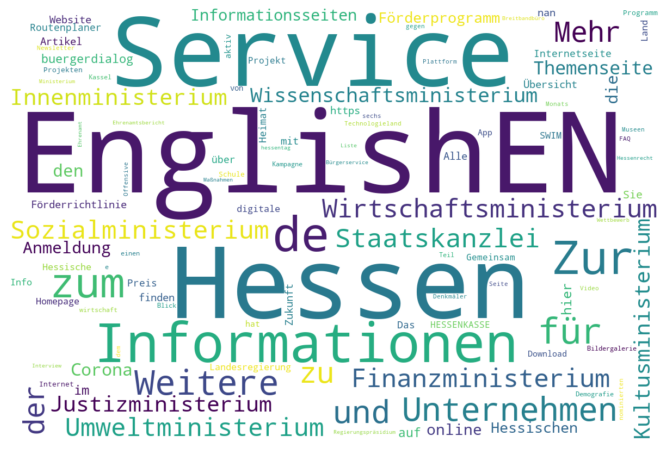

In [18]:
text = " ".join(str(linktext) for linktext in heSpider["text"])
wordcloud = WordCloud(background_color="white", width=1200, height=800, min_font_size=10, collocations=False).generate(text)


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sicherheits-Vergleich

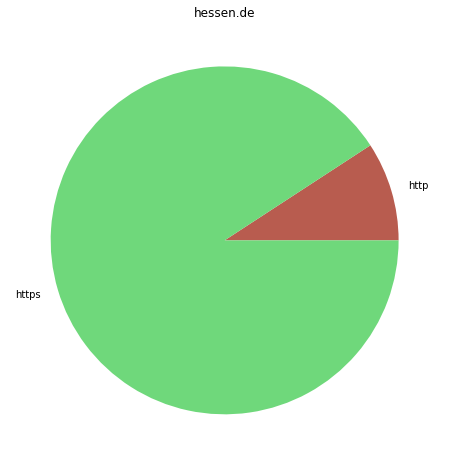

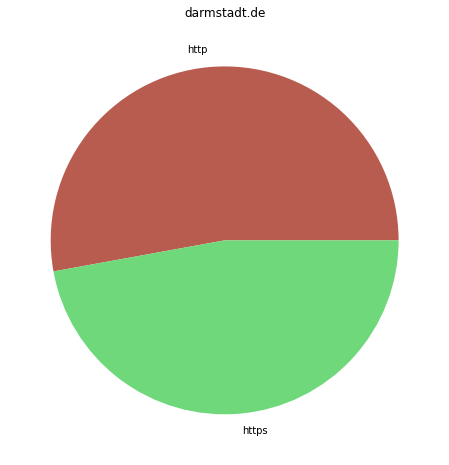

In [34]:
da_protocols = daSpider.copy(deep=True)[["from", "url"]]
da_protocols["url"] = da_protocols["url"].apply(lambda x: tld.get_tld(x, fail_silently=True, as_object=True).parsed_url.scheme if tld.get_tld(x, fail_silently=True, as_object=True) else "")
da_protocols = da_protocols.groupby(by="url", as_index=False)[["from"]].nunique().rename(columns={"from": "count"})
da_protocols = da_protocols[da_protocols.url.str.len() > 0]

he_protocols = heSpider.copy(deep=True)[["from", "url"]]
he_protocols["url"] = he_protocols["url"].apply(lambda x: tld.get_tld(x, fail_silently=True, as_object=True).parsed_url.scheme if tld.get_tld(x, fail_silently=True, as_object=True) else "")
he_protocols = he_protocols.groupby(by="url", as_index=False)[["from"]].nunique().rename(columns={"from": "count"})
he_protocols = he_protocols[he_protocols.url.str.len() > 0]

colors = {'http':'#b85c4f', 'https':'#6fd87b'}

he_protocols.set_index("url", drop=True).plot.pie(title='hessen.de', y='count', legend=False, figsize=(14, 8), ylabel='', colors=he_protocols['url'].apply(lambda x: colors[x]).drop_duplicates())
plt.show()
da_protocols.set_index("url", drop=True).plot.pie(title='darmstadt.de', y='count', legend=False, figsize=(14, 8), ylabel='', colors=he_protocols['url'].apply(lambda x: colors[x]).drop_duplicates())
plt.show()